# Practical Test TCV3151 Computer Vision
Bagja 9102 Kurniawan <br> **1211501345**

## Preparatory Work

Mount Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import the packages.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 : Let’s play the famous squid game in this question.

Read the image ‘squid_game.jpg’.

(<matplotlib.image.AxesImage at 0x7f204488ff10>, (-0.5, 639.5, 359.5, -0.5))

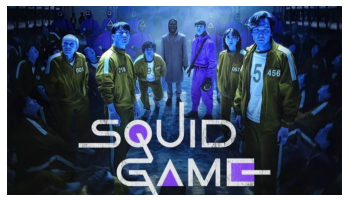

In [3]:
path = '/content/gdrive/My Drive/TCV3151/Practical_Test/'

img=cv2.imread(path+'squid_game.jpg')
plt.imshow(img), plt.axis('off')

Convert the image from BGR to RGB

(<matplotlib.image.AxesImage at 0x7f20334b8810>, (-0.5, 639.5, 359.5, -0.5))

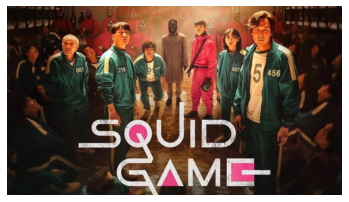

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show the image after color conversion
plt.imshow(img), plt.axis('off')

Make the image to appear bluish- and greenish-like (e.g. Figure 1.2). 

(<matplotlib.image.AxesImage at 0x7f203349ad10>, (-0.5, 639.5, 359.5, -0.5))

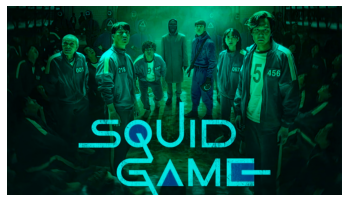

In [5]:
# Make a copy of the image
img = img.copy()

# Make all red pixels to zero
img[:,:,0] = 0
plt.imshow(img), plt.axis('off')

### Question 2
We continue with the game in this question. This time, we will count the number of players in the game (refer Figure 2.1).<br>We will only work with a selected region of interest (ROI) as shown in Figure 2.2. You will start processing using the binary image of the ROI shown in Figure 2.3. 


Read the image ‘binary_roi.jpg’

(<matplotlib.image.AxesImage at 0x7f20333f7ed0>, (-0.5, 532.5, 354.5, -0.5))

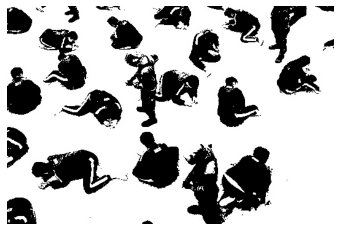

In [6]:
path = '/content/gdrive/My Drive/TCV3151/Practical_Test/'

img=cv2.imread(path+'binary_roi.jpg')
plt.imshow(img), plt.axis('off')

Apply necessary pre-processing step like morphological operations to obtain a cleaner image (e.g. remove noise and separate the objects/people better). A sample output of the pre-processed image is shown in Figure 2.4. If necessary, you can apply more than one pre-processing steps in your program. 
<br>Hint: If you are using morphological operations like opening and closing functions, a structuring element of elliptical shape of size 6 x 6 can be used. 


(<matplotlib.image.AxesImage at 0x7f20333cdd10>, (-0.5, 532.5, 354.5, -0.5))

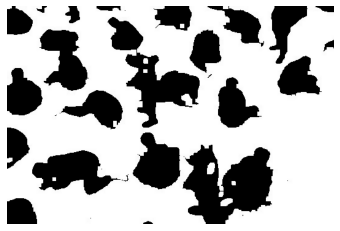

In [7]:
er = np.ones((6, 6),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_OPEN, er)
plt.imshow(erosion), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f203333fbd0>, (-0.5, 532.5, 354.5, -0.5))

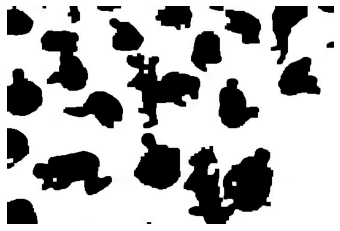

In [8]:
dilation = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, er)
plt.imshow(dilation), plt.axis('off')

Segment the objects/people from the image by enclosing a boundary around each object/person. A sample output is shown in Figure 2.5.  

(<matplotlib.image.AxesImage at 0x7f203331fb10>, (-0.5, 532.5, 354.5, -0.5))

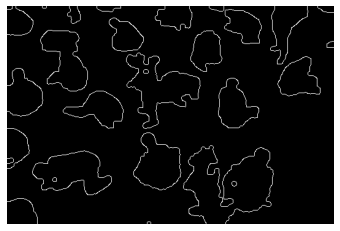

In [9]:
#Apply Canny edge detector.
edges = cv2.Canny(dilation,100,200) # Apply Canny edge detector with parameter of 100, 200
plt.imshow(edges, cmap='gray'), plt.axis('off')

## Question 3
You will perform some special effects by combining two photos (Figure 3.1 and Figure 3.2) together.

Read images ‘red_worker.jpg’ and ‘doll.jpg’. Convert the images to grayscale. 

(<matplotlib.image.AxesImage at 0x7f2033282c10>, (-0.5, 515.5, 440.5, -0.5))

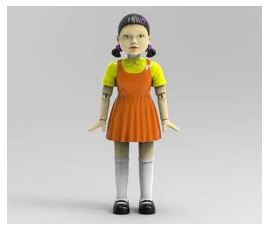

In [10]:
doll = cv2.imread(path+'doll.jpg')
doll = cv2.cvtColor(doll, cv2.COLOR_BGR2RGB)
plt.imshow(doll), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f2033263f10>, (-0.5, 437.5, 225.5, -0.5))

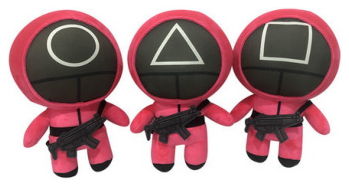

In [11]:
red_worker = cv2.imread(path+'red_worker.jpg')
red_worker = cv2.cvtColor(red_worker, cv2.COLOR_BGR2RGB)
plt.imshow(red_worker), plt.axis('off')

Apply thresholding to the two images. Sample output are shown in Figure 3.3 and Figure 3.4.


(<matplotlib.image.AxesImage at 0x7f20331cf0d0>, (-0.5, 515.5, 440.5, -0.5))

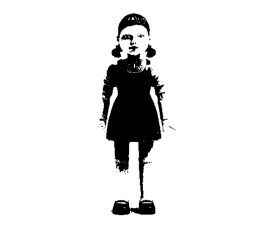

In [12]:
gray = cv2.cvtColor(doll, cv2.COLOR_BGR2GRAY) # Convert image to grayscale
ret, thresh1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh1, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f203312e3d0>, (-0.5, 437.5, 225.5, -0.5))

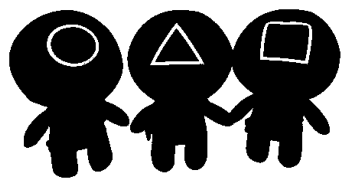

In [13]:
gray = cv2.cvtColor(red_worker, cv2.COLOR_BGR2GRAY) # Convert image to grayscale
ret, thresh2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh2, cmap='gray'), plt.axis('off')

Find the size of the red worker image.

In [14]:
thresh2.shape

(226, 438)

Let say the size of the worker image is given by N x M. Extract the upper part of the doll image by taking the N x M pixels of the upper right corner of the image as shown in Figure 3.5.

(<matplotlib.image.AxesImage at 0x7f2033111710>, (-0.5, 437.5, 225.5, -0.5))

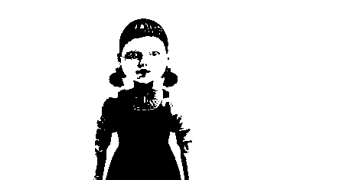

In [15]:
(rows1,cols1) = thresh1.shape
(rows2,cols2) = thresh2.shape
roi = thresh1[0:rows2, cols1-cols2:cols1]
plt.imshow(roi, cmap='gray'), plt.axis('off')

Combine the red workers image (Figure 3.3) and extracted doll image (Figure 3.6) to obtain the special effect as depicted in Figure 3.7.

(-0.5, 437.5, 225.5, -0.5)

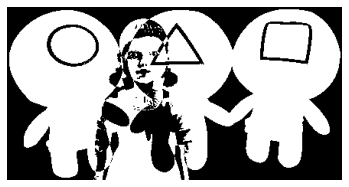

In [16]:
result_xor = cv2.bitwise_xor(thresh2, roi, mask = None)
plt.imshow(result_xor, cmap='gray')
plt.axis('off')